<a href="https://colab.research.google.com/github/Enoque12/challenge1-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
from urllib.request import urlopen
import pandas as pd
import csv

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#loja1.head()

urls = [url1, url2, url3, url4]
lojas = ['loja1', 'loja2', 'loja3', 'loja4']

#Função para ler o ficheiro csv a partir da URL
def ler_csv(url):
  dados = []
  with urlopen(url) as resposta:
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    for linha in leitor:
      dados.append(linha)
  return dados



#1. Análise do faturamento


O faturamento das Lojas é o seguinte:
loja1 = R$ 1534509.12
loja2 = R$ 1488459.06
loja3 = R$ 1464025.03
loja4 = R$ 1384497.58
O faturamento total e = R$ 5871490.79


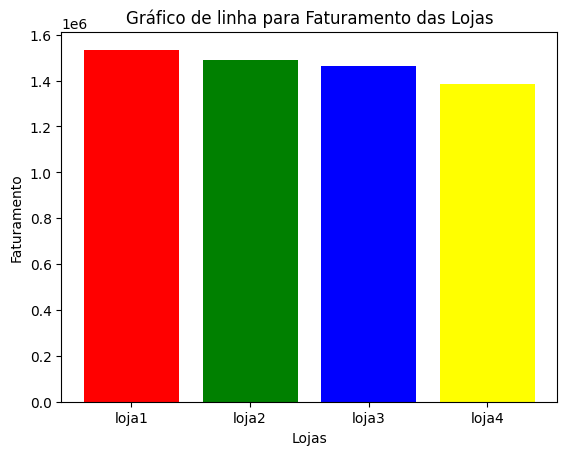

In [90]:
import matplotlib.pyplot as plt
dicionario_faturamento = {}

for loja, url in zip(lojas, urls):
  soma = 0
  lista = ler_csv(url)
  for i in range(len(lista)):
      soma += float(lista[i]["Preço"])
  dicionario_faturamento[loja] = soma

print("O faturamento das Lojas é o seguinte:")
for chave, valor in dicionario_faturamento.items():
  print(f"{chave} = R$ {round(valor, 3)}")

print(f"O faturamento total e = R$ {round(sum(dicionario_faturamento.values()), 3)}")

cores = ['red', 'green', 'blue', 'yellow']

plt.bar(dicionario_faturamento.keys(), dicionario_faturamento.values(), color = cores)
plt.title("Gráfico de linha para Faturamento das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.show()

# 2. Vendas por Categoria


In [63]:
dicionario_lojas = {}

for loja, url in zip(lojas, urls):
  lista = ler_csv(url)
  dicionario_categoria = {}

  for i in range(len(lista)):
    dicionario_categoria[lista[i]["Categoria do Produto"]] = 0

  for chave in dicionario_categoria.keys():
    soma = 0
    for i in range(len(lista)):
      if chave == lista[i]["Categoria do Produto"]:
        soma += float(lista[i]["Preço"])
    dicionario_categoria[chave] = soma
  dicionario_lojas[loja] = dicionario_categoria

print("As vendas por categoria de cada loja sao:")
for loja, valor in dicionario_lojas.items():
  print(f"Para a {loja}")
  for categoria, totalVendas in valor.items():
    print(f"{categoria} = R$ {round(totalVendas, 3)}")

  print()



As vendas por categoria de cada loja sao:
Para a loja1
eletronicos = R$ 572659.23
moveis = R$ 250178.11
brinquedos = R$ 23993.78
eletrodomesticos = R$ 484913.36
utilidades domesticas = R$ 16931.48
esporte e lazer = R$ 52387.55
livros = R$ 11713.92
instrumentos musicais = R$ 121731.69

Para a loja2
moveis = R$ 235234.68
instrumentos musicais = R$ 139987.03
esporte e lazer = R$ 46326.09
eletronicos = R$ 547773.71
utilidades domesticas = R$ 19662.86
brinquedos = R$ 21262.21
eletrodomesticos = R$ 464758.13
livros = R$ 13454.35

Para a loja3
eletrodomesticos = R$ 438984.89
moveis = R$ 268095.56
instrumentos musicais = R$ 103174.45
esporte e lazer = R$ 47456.1
eletronicos = R$ 547699.92
brinquedos = R$ 25869.2
utilidades domesticas = R$ 20080.21
livros = R$ 12664.7

Para a loja4
eletrodomesticos = R$ 377680.65
moveis = R$ 256705.65
esporte e lazer = R$ 44465.65
livros = R$ 12427.77
eletronicos = R$ 545966.86
instrumentos musicais = R$ 100136.5
brinquedos = R$ 27015.67
utilidades domesticas =

# 3. Média de Avaliação das Lojas

A média de Avaliação das lojas está da seguinte maneira: 
loja1 = 3.977
loja2 = 4.037
loja3 = 4.048
loja4 = 3.996


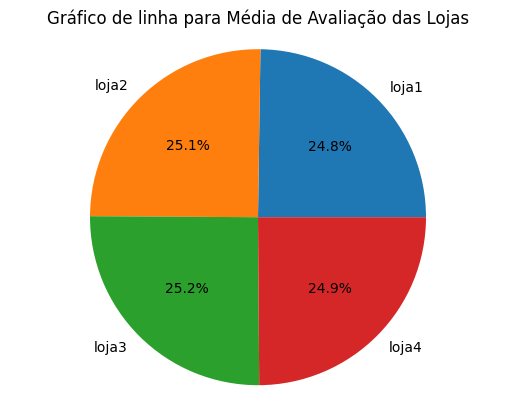

In [91]:
import matplotlib.pyplot as plt

dicionario_Media_avaliacao = {}

for loja, url in zip(lojas, urls):
  soma = 0
  lista = ler_csv(url)
  for i in range(len(lista)):
      soma += float(lista[i]["Avaliação da compra"])
  media = round(soma / len(lista), 3)
  dicionario_Media_avaliacao[loja] = media

print("A média de Avaliação das lojas está da seguinte maneira: ")
for loja, media in dicionario_Media_avaliacao.items():
  print(f"{loja} = {media}")

plt.pie(dicionario_Media_avaliacao.values(), labels = dicionario_Media_avaliacao.keys(), autopct='%1.1f%%')
plt.title("Gráfico de linha para Média de Avaliação das Lojas")
plt.axis('equal')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [82]:
dicionario_lojas = {}
listaMedias = []

for loja, url in zip(lojas, urls):
    lista = ler_csv(url)
    dicionario_Produtos = {}

    for item in lista:
        produto = item["Produto"]
        if produto in dicionario_Produtos:
            dicionario_Produtos[produto] += 1
        else:
            dicionario_Produtos[produto] = 1

    total_vendidos = sum(dicionario_Produtos.values())
    num_produtos = len(dicionario_Produtos)
    media = total_vendidos / num_produtos if num_produtos > 0 else 0
    listaMedias.append(round(media, 3))

    dicionario_lojas[loja] = dicionario_Produtos


print("Os produtos disponíveis em cada loja são:")
for indice, (loja, produtos) in enumerate(dicionario_lojas.items()):
    print(f"\nPara a {loja}:")
    for produto, quantidade in produtos.items():
        print(f"{produto} = {quantidade}")

    print("\nProdutos mais vendidos:")
    for produto, quantidade in produtos.items():
        if quantidade > listaMedias[indice]:
            print(f'{produto} com {quantidade} unidades vendidas')

    print("\nProdutos menos vendidos:")
    for produto, quantidade in produtos.items():
        if quantidade < listaMedias[indice]:
            print(f'{produto} com {quantidade} unidades vendidas')


Os produtos disponíveis em cada loja são:

Para a loja1:
Assistente virtual = 40
Mesa de jantar = 40
Jogo de tabuleiro = 43
Micro-ondas = 60
Cadeira de escritório = 46
Blocos de montar = 56
Boneca bebê = 40
Lava louças = 48
Lavadora de roupas = 47
Carrinho controle remoto = 52
Geladeira = 54
Fone de ouvido = 50
Panela de pressão = 35
Bicicleta = 54
Ciência de dados com python = 39
Bola de vôlei = 42
Xadrez de madeira = 49
TV Led UHD 4K = 60
Copo térmico = 54
Kit banquetas = 44
Dashboards com Power BI = 42
Faqueiro = 52
Jogo de panelas = 43
Bateria = 53
Corda de pular = 40
Fogão = 45
Cama box = 44
Impressora = 54
Cômoda = 56
Guarda roupas = 60
Dinossauro Rex = 40
Guitarra = 47
Secadora de roupas = 58
Sofá retrátil = 46
Tablet ABXY = 42
Cubo mágico 8x8 = 44
Jogo de copos = 41
Modelagem preditiva = 51
Celular Plus X42 = 49
Mochila = 39
Bola de basquete = 55
Headset = 33
Poltrona = 41
Violão = 46
Iniciando em programação = 41
Celular ABXY = 33
Smartwatch = 43
Mesa de centro = 44
Cama king 

# 5. Frete Médio por Loja


O frete medio das lojas está da seguinte maneira: 
loja1 = 34.692
loja2 = 33.622
loja3 = 33.074
loja4 = 31.279


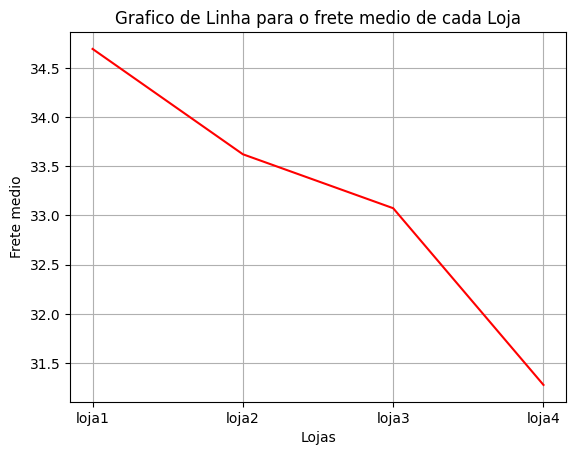

In [93]:
import matplotlib.pyplot as plt

dicionario_Frete_medio = {}

for loja, url in zip(lojas, urls):
  soma = 0
  lista = ler_csv(url)
  for item in lista:
      soma += float(item["Frete"])
  media = round(soma / len(lista), 3)
  dicionario_Frete_medio[loja] = media

print("O frete medio das lojas está da seguinte maneira: ")
for loja, frete in dicionario_Frete_medio.items():
  print(f"{loja} = {frete}")

plt.plot(dicionario_Frete_medio.keys(), dicionario_Frete_medio.values(), color = 'red')
plt.title("Grafico de Linha para o frete medio de cada Loja")
plt.xlabel('Lojas')
plt.ylabel('Frete medio')
plt.grid(True)
plt.show()